### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# Check for missing values
print(data.isnull().sum())

# List the unique values in each column, this will help to identify the issue with data set
for column in data.columns:
    print(f"Distinct values in {column}: {data[column].unique()}")

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
Distinct values in destination: ['No Urgent Place' 'Home' 'Work']
Distinct values in passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Distinct values in weather: ['Sunny' 'Rainy' 'Snowy']
Distinct values 

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# To handle the missing values we can either use data removal or imputation. We will follow the imputation process
# We will use the mean for numerical columns and mode for categorical columns


# Here we will identifiy the columns, if they are numerical or categorical
numerical_columns  = data.select_dtypes(include=np.number).columns
categorical_columns = data.select_dtypes(exclude=np.number).columns

# Impute the numerical columns with mean
for columns in numerical_columns:
    if data[columns].isnull().any():
        data[columns].fillna(data[columns].mean(), inplace=True)


# Impute the categorical columns with mode
for column in categorical_columns:
    if data[column].isnull().any():
        data[column].fillna(data[column].mode()[0], inplace=True)

# Verify if there are anymore missing values
print(data.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


/var/folders/wg/0yvtxm4n0_z_kg6hrcxdpw8h0000gn/T/ipykernel_20957/1372266100.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


4. What proportion of the total observations chose to accept the coupon?



In [6]:
# Calculate the acceptance rate
rate_percentage = data['Y'].value_counts(normalize=True)

print(rate_percentage * 100)

Y
1    56.843267
0    43.156733
Name: proportion, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

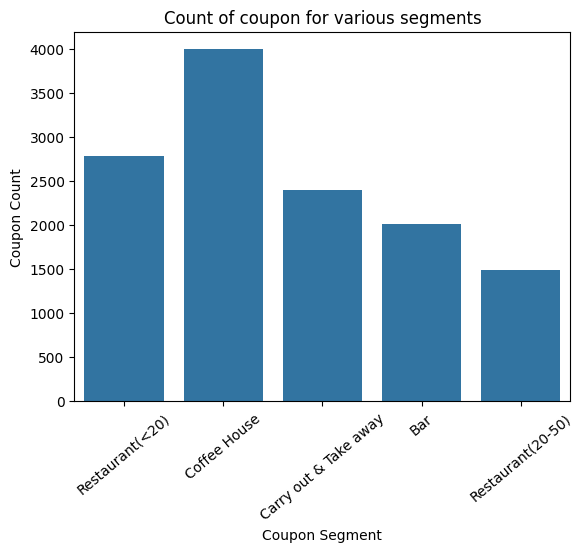

In [7]:
# Bar plot for coupon column
sns.countplot(data = data, x='coupon')
plt.xticks(rotation=40)
plt.title("Count of coupon for various segments")
plt.xlabel('Coupon Segment')
plt.ylabel('Coupon Count')
plt.show()

6. Use a histogram to visualize the temperature column.

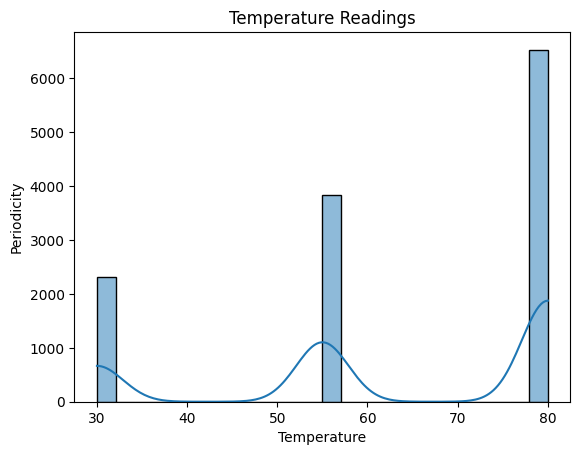

In [8]:
# Histogram to visualize temperature - 1
sns.histplot(data['temperature'], kde=True)
plt.title('Temperature Readings')
plt.xlabel('Temperature')
plt.ylabel('Periodicity')
plt.show()

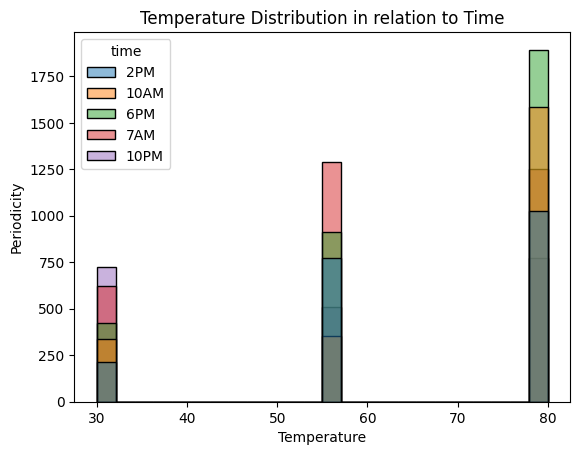

In [9]:
# Histogram to visualize temperature - 2
sns.histplot(data, x = 'temperature', hue='time' )
plt.title('Temperature Distribution in relation to Time')
plt.xlabel('Temperature')
plt.ylabel('Periodicity')
plt.show()

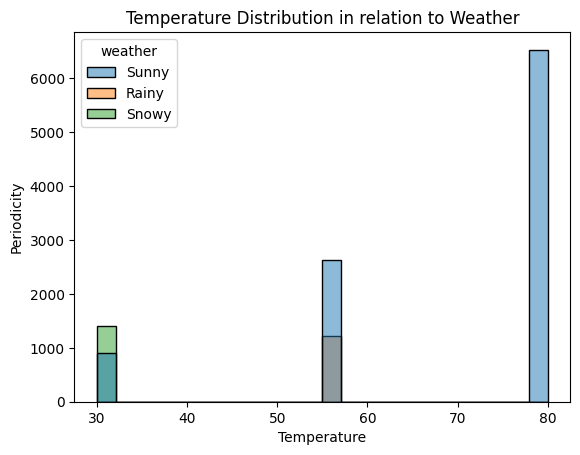

In [10]:
# Histogram to visualize temperature - 3
sns.histplot(data, x = 'temperature', hue='weather' )
plt.title('Temperature Distribution in relation to Weather')
plt.xlabel('Temperature')
plt.ylabel('Periodicity')
plt.show()

In [11]:

# Histogram to visualize temperature - 4
px.histogram(data, x="temperature", nbins=20, histnorm='probability density')

In [12]:
# Histogram to visualize temperature - 5
px.histogram(data, x='temperature', cumulative=True, color='weather')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
# Create DataFrame for Bar Coupons

bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?


In [14]:
# Bar Coupon acceptance rate
rate_percentage = bar_coupons['Y'].value_counts(normalize=True)

print(rate_percentage * 100)

Y
0    58.998513
1    41.001487
Name: proportion, dtype: float64


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [15]:
# People who went ot bar 3 or fewer times, we will name them less_frequent_group and remaining people as more_frequent_group

less_frequent_group = bar_coupons[(bar_coupons['Bar'] == '1~3') |  (bar_coupons['Bar'] == 'less1') | (bar_coupons['Bar'] == 'never')]
more_frequent_group = bar_coupons[~((bar_coupons['Bar'] == '1~3') |  (bar_coupons['Bar'] == 'less1') | (bar_coupons['Bar'] == 'never'))]

rate_less_frequent_group= less_frequent_group['Y'].value_counts(normalize=True)
rate_more_frequent_group = more_frequent_group['Y'].value_counts(normalize=True)

print(rate_less_frequent_group * 100)
print(rate_more_frequent_group * 100)

Y
0    62.926293
1    37.073707
Name: proportion, dtype: float64
Y
1    76.884422
0    23.115578
Name: proportion, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [16]:

# Group data based on bar visits and age criteria
less_frequent_drivers = bar_coupons[(bar_coupons['Bar'] > '1~3') | (bar_coupons['Bar'] == '4~8') | (bar_coupons['Bar'] == 'gt8') & (bar_coupons['age'] == '26') | (bar_coupons['age'] == '31') | (bar_coupons['age'] == '36') | (bar_coupons['age'] == '41') | (bar_coupons['age'] == '46') | (bar_coupons['age'] == '5oplus')]
more_frequent_drivers = bar_coupons[(bar_coupons['Bar'] == 'never') | (bar_coupons['Bar'] == 'less1') & (bar_coupons['age'] == '21') | (bar_coupons['age'] == 'below21')]

# Calculate acceptance rates for each group
acceptance_rate_less_frequent_drivers = less_frequent_drivers['Y'].value_counts(normalize=True)
acceptance_rate_more_frequent_drivers = more_frequent_drivers['Y'].value_counts(normalize=True)


print("Acceptance Rate for Group (Bar > 1~3 times/month and age > 25):\n", acceptance_rate_less_frequent_drivers * 100)
print("\nAcceptance Rate for Group 2 (All others):\n", acceptance_rate_more_frequent_drivers * 100)


Acceptance Rate for Group (Bar > 1~3 times/month and age > 25):
 Y
0    62.756264
1    37.243736
Name: proportion, dtype: float64

Acceptance Rate for Group 2 (All others):
 Y
0    75.739042
1    24.260958
Name: proportion, dtype: float64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [18]:

# Group data based on number of bar visits, the passenger type, and the occupation
more_frequent = bar_coupons[
    (bar_coupons['Bar'] > '1~3')
    & (bar_coupons['passanger'] != 'Kid(s)')
    & (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))
]
less_frequent = bar_coupons[
    ~((bar_coupons['Bar'] > '1~3')
      & (bar_coupons['passanger'] != 'Kid(s)')
      & (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry'])))
]

# Calculate acceptance rates for each group
more_frequent_rate = more_frequent['Y'].value_counts(normalize=True)
less_frequent_rate = less_frequent['Y'].value_counts(normalize=True)

print(
    "Acceptance Rate for Group(Bar > 1~3 times/month, no kids, and not in Farming/Fishing/Forestry):\n",
    more_frequent_rate * 100,
)
print("\nAcceptance Rate for Group(All others):\n", less_frequent_rate * 100)

Acceptance Rate for Group(Bar > 1~3 times/month, no kids, and not in Farming/Fishing/Forestry):
 Y
0    62.906574
1    37.093426
Name: proportion, dtype: float64

Acceptance Rate for Group(All others):
 Y
1    50.874126
0    49.125874
Name: proportion, dtype: float64


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [19]:

# First Group: More than one visit/month to bar, no kids and were not widowed
group1 = bar_coupons[
    (bar_coupons['Bar'] > '1~3')
    & (bar_coupons['passanger'] != 'Kid(s)')
    & (bar_coupons['maritalStatus'] != 'Widowed')
]

# Second Group: More then one visit/month to bar, and aeg is less than 30 yrs
group2 = bar_coupons[(bar_coupons['Bar'] > '1~3') & (bar_coupons['age'] == 'below21') | (bar_coupons['age'] == '21') | (bar_coupons['age'] == '21~25')]

# Third Group: Visits Cheap restaurants more than 4 times a month, and income less than 50K
group3 = data[
    (data['RestaurantLessThan20'] > '4~8')
    & (data['income'] == '$37500 - $49999') | (data['income'] == '$12500 - $24999') | (data['income'] == '$25000 - $37499') | (data['income'] == 'Less than $12500')
]


# Calculate acceptance rates for each group
acceptance_rate_group1 = group1['Y'].value_counts(normalize=True)
acceptance_rate_group2 = group2['Y'].value_counts(normalize=True)
acceptance_rate_group3 = group3['Y'].value_counts(normalize=True)


print(
    "Acceptance Rate for First Group:\n",
    acceptance_rate_group1 * 100,
)
print("\nAcceptance Rate for Second Group:\n", acceptance_rate_group2 * 100)
print(
    "\nAcceptance Rate for Third Group:\n",
    acceptance_rate_group3 * 100,
)

Acceptance Rate for First Group:
 Y
0    62.797203
1    37.202797
Name: proportion, dtype: float64

Acceptance Rate for Second Group:
 Y
0    50.803213
1    49.196787
Name: proportion, dtype: float64

Acceptance Rate for Third Group:
 Y
1    58.660681
0    41.339319
Name: proportion, dtype: float64


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Hypothesis

1. Frequent bar visitors, those who make a visit more than once a month are more likely to accept the bar coupons
2. Age plays a significant role in the acceptance rate, those between the age of 25-30 has higher acceptance rate, than those who are more than 30.
3. Marital status too seems to make an impact, those who are not widowed show higher acceptance rate.
4. One pattern we observed that if children are present as passanger then the acceptance rate declines.
5. We can observe that if people are not in the occupation of Farming Fishing & Forestry, then there acceptance rate is higher.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [20]:

# Focus on Coffee House coupons
carryout_takeaway_coupons = data[data['coupon'] == 'Carry out & Take away']



In [21]:
# Acceptance rate for carryout and takeaway coupons coupons
carryout_takeaway_acceptance_rate = carryout_takeaway_coupons['Y'].value_counts(normalize=True)
print("Overall Coffee House Coupon Acceptance Rate:\n", carryout_takeaway_acceptance_rate * 100)

Overall Coffee House Coupon Acceptance Rate:
 Y
1    73.547848
0    26.452152
Name: proportion, dtype: float64


In [22]:
# Compare acceptance rates based on frequency of carryout and takeaway coupons
carryout_takeaway_acceptance = carryout_takeaway_coupons.groupby(['CarryAway', 'Y']).size().unstack(fill_value=0)
carryout_takeaway_acceptance['Acceptance Rate'] = carryout_takeaway_acceptance[1] / (carryout_takeaway_acceptance[1] + carryout_takeaway_acceptance[0])
print("\nCarryout/takeaway vs. Acceptance Rate:\n", carryout_takeaway_acceptance)


Carryout/takeaway vs. Acceptance Rate:
 Y            0    1  Acceptance Rate
CarryAway                           
1~3        231  655         0.739278
4~8        202  618         0.753659
gt8         79  223         0.738411
less1      113  240         0.679887
never        8   24         0.750000


In [23]:
# Compare acceptance rates for those who do carryout/takeaway more than once a month and have an income greater than $50k
group1 = carryout_takeaway_coupons[(carryout_takeaway_coupons['CarryAway'] > '1~3') & (carryout_takeaway_coupons['income'].isin(['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']))]
group2 = carryout_takeaway_coupons[~((carryout_takeaway_coupons['CarryAway'] > '1~3') & (carryout_takeaway_coupons['income'].isin(['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'])))]

acceptance_rate_group1 = group1['Y'].value_counts(normalize=True)
acceptance_rate_group2 = group2['Y'].value_counts(normalize=True)

print("\nAcceptance Rate for Group 1:\n", acceptance_rate_group1 * 100)
print("\nAcceptance Rate for Group 2:\n", acceptance_rate_group2 * 100)


Acceptance Rate for Group 1:
 Y
1    71.366906
0    28.633094
Name: proportion, dtype: float64

Acceptance Rate for Group 2:
 Y
1    74.440518
0    25.559482
Name: proportion, dtype: float64


In [106]:
# Impact of time of day
time_acceptance = carryout_takeaway_coupons.groupby(['time', 'Y']).size().unstack(fill_value=0)
time_acceptance['Acceptance Rate'] = time_acceptance[1] / (time_acceptance[1] + time_acceptance[0])
print("\nTime of Day vs. Acceptance Rate:\n", time_acceptance * 100)


Time of Day vs. Acceptance Rate:
 Y         0      1  Acceptance Rate
time                               
10AM  15400  36300        70.212766
10PM  11100  35000        75.921909
2PM    2900  18900        86.697248
6PM    7600  35900        82.528736
7AM   26300  49900        65.485564
